In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pyfolio.timeseries import perf_stats
import sys
sys.path.append('/home/tomek/ib_tools')
from blotter import MongoBlotter
%matplotlib inline

In [2]:
cash = 109394
df = MongoBlotter().read()
df.tail(30)

,_id,sys_time,time,contract,action,amount,price,exec_ids,order_id,perm_id,reason,commission,realizedPNL
911,5fad98188d07f6f3e2d85026,2020-11-12 21:16:24.698,2020-11-12 20:16:24.622,MNQZ0,BUY,5.0,11818.500000,[0000e1a7.5fad5f23.01.01],125,873288725,STOP-LOSS,2.35,-195.200000
912,5fad98188d07f6f3e2d85027,2020-11-12 21:16:24.699,2020-11-12 20:16:24.696,NQZ0,BUY,2.0,11819.000000,[0000e1a7.5fad5f24.01.01],124,873288724,STOP-LOSS,4.20,-1063.400000
913,5faebbb48d07f6f3e2d85410,2020-11-13 18:00:36.473,2020-11-13 17:00:36.427,MESZ0,BUY,6.0,3565.000000,[0000e1a7.5fae6253.01.01],91,1679694240,ENTRY,2.82,0.000000
914,5faedd158d07f6f3e2d85481,2020-11-13 20:23:01.645,2020-11-13 19:23:01.596,YM DEC 20,BUY,2.0,29386.000000,"[0000e1a7.5fae9a95.01.01, 0000e1a7.5fae9a96.01...",93,1679694245,ENTRY,4.20,0.000000
915,5faeed7d8d07f6f3e2d854ba,2020-11-13 21:33:01.885,2020-11-13 20:33:01.829,MNQZ0,BUY,1.0,11930.000000,[0000e1a7.5faea793.01.01],96,1679694254,ENTRY,0.47,0.000000
916,5faeed7d8d07f6f3e2d854bb,2020-11-13 21:33:01.886,2020-11-13 20:33:01.829,NQZ0,BUY,3.0,11934.000000,"[0000e1a7.5faea790.01.01, 0000e1a7.5faea792.01...",95,1679694250,ENTRY,6.30,0.000000
917,5fb1c4dcebd92f95351199bc,2020-11-16 01:16:28.695,2020-11-16 00:16:28.685,MNQZ0,SELL,1.0,12030.500000,[0000e1a7.5fb1b848.01.01],97,1679694255,STOP-LOSS,0.47,200.060000
918,5fb1da10ebd92f95351199fb,2020-11-16 02:46:56.861,2020-11-16 01:46:56.858,NQZ0,SELL,3.0,12030.000000,[0000e1a7.5fb1bfe8.01.01],98,1679694256,STOP-LOSS,6.30,5747.400000
919,5fb1ef8bebd92f9535119a44,2020-11-16 04:18:35.495,2020-11-16 03:18:35.357,NQZ0,BUY,2.0,12044.125000,"[0000e1a7.5fb1c914.01.01, 0000e1a7.5fb1c917.01...",237,1594775445,ENTRY,4.20,0.000000
920,5fb1ef9febd92f9535119a45,2020-11-16 04:18:55.156,2020-11-16 03:18:55.062,MNQZ0,BUY,5.0,12044.500000,"[0000e1a7.5fb1c915.01.01, 0000e1a7.5fb1c91c.01...",238,1594775448,ENTRY,2.35,0.000000


In [3]:
df.head()

,_id,sys_time,time,contract,action,amount,price,exec_ids,order_id,perm_id,reason,commission,realizedPNL
0,5f0f0525bd2ee6b18fd4eeb2,2020-07-15 15:31:17.017,2020-07-15 13:31:17.007,MYM SEP 20,SELL,6.0,26855.00,[0000e1a7.5f0f086b.01.01],1248,779987153,STOP-LOSS,2.82,1416.36
1,5f0f0525bd2ee6b18fd4eeb3,2020-07-15 15:31:17.560,2020-07-15 13:31:17.559,YM SEP 20,SELL,1.0,26855.00,[0000e1a7.5f0f086d.01.01],1247,779987152,STOP-LOSS,2.10,2370.80
2,5f0f1613f81f3181af388633,2020-07-15 16:43:31.133,2020-07-15 14:43:31.088,NQU0,BUY,1.0,10749.00,[0000e1a7.5f0f3a1f.01.01],1265,165612016,ENTRY,2.10,0.00
3,5f0f1613f81f3181af388634,2020-07-15 16:43:31.139,2020-07-15 14:43:31.133,MNQU0,BUY,1.0,10748.75,[0000e1a7.5f0f3a20.01.01],1266,165612017,ENTRY,0.47,0.00
4,5f0f1923f81f3181af38863d,2020-07-15 16:56:35.084,2020-07-15 14:56:35.083,MNQU0,SELL,1.0,10717.50,[0000e1a7.5f0f3fa0.01.01],1268,165612019,STOP-LOSS,0.47,-63.44


In [4]:
df[df.reason.str.startswith('MANUAL')]

,_id,sys_time,time,contract,action,amount,price,exec_ids,order_id,perm_id,reason,commission,realizedPNL
372,5f48024d0b06e6e56accaabb,2020-08-27 20:58:21.765,2020-08-27 18:58:21.760,NQU0,SELL,1.0,11961.75,[0000e1a7.5f47e774.01.01],-3,2141716104,MANUAL TRADE,2.1,0.0
373,5f48027e0b06e6e56accaabc,2020-08-27 20:59:10.623,2020-08-27 18:59:10.619,NQU0,BUY,1.0,11961.00,[0000e1a7.5f47e791.01.01],-4,2141716114,MANUAL TRADE,2.1,10.8
404,5f525a98f2a5ab6f74f19b3e,2020-09-04 17:17:44.300,2020-09-04 15:17:44.298,NQU0,SELL,1.0,11320.75,[0000e1a7.5f526f0b.01.01],-4,1940011984,MANUAL TRADE,2.1,0.0
432,5f7d98e9140b04161c23105c,2020-10-07 12:31:05.067,2020-10-07 10:31:05.065,NQZ0,SELL,1.0,11319.00,[0000e1a7.5f7d1bd9.01.01],-4,533904426,MANUAL TRADE,2.1,-169.2


In [5]:
df = df[df['sys_time'] > '20201008']

In [6]:
df.count()

_id            502
sys_time       502
time           502
contract       502
action         502
amount         502
price          502
exec_ids       502
order_id       502
perm_id        502
reason         502
commission     502
realizedPNL    502
dtype: int64

In [7]:
df[df.realizedPNL>0].realizedPNL.count()

89

In [8]:
#del df['sys_time']
del df['exec_ids']
del df['perm_id']
del df['_id']
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df['cash'] = df.realizedPNL.cumsum() + cash
df['contract'] = df['contract'].apply(lambda x: x[:-2])
micro_contracts = df[df.contract.str.startswith('M')]
macro_contracts = df[~df.contract.str.startswith('M')]
micro_contracts['amount'] /= 10
df = pd.concat([macro_contracts, micro_contracts]).sort_index()
df.contract = df.contract.str.strip('M')
df['contract'] = df['contract'].apply(lambda x: x[:2])
df.contract = df.contract.str.strip()

In [9]:
df.tail()

,sys_time,contract,action,amount,price,order_id,reason,commission,realizedPNL,cash
time,,,,,,,,,,
2020-11-20 04:43:03.518,2020-11-20 05:43:03.656,NQ,BUY,3.0,11996.166667,209,ENTRY,6.30,0.00,131726.500011
2020-11-20 06:21:24.326,2020-11-20 07:21:24.355,NQ,SELL,3.0,11981.000000,212,STOP-LOSS,6.30,-922.60,130803.900011
2020-11-20 06:21:24.353,2020-11-20 07:21:24.357,NQ,SELL,0.2,11980.750000,211,STOP-LOSS,0.94,-62.88,130741.020011
2020-11-20 12:16:02.623,2020-11-20 13:16:02.708,NQ,BUY,0.2,12018.000000,92,ENTRY,0.94,0.00,130741.020011
2020-11-20 12:16:10.030,2020-11-20 13:16:10.128,NQ,BUY,3.0,12017.750000,91,ENTRY,6.30,0.00,130741.020011


In [10]:
c = set(df['contract'])
allocs = pd.Series([1/len(c)]*len(c) +[1], index=list(c) + ['total'])
#allocs = pd.Series([1/3, 2/3, 1], index=['ES','NQ', 'total'])
allocs = pd.Series([.4, .125, .225, .25, 1], index=['NQ','ES', 'GC', 'YM', 'total'])

In [11]:
allocs

NQ       0.400
ES       0.125
GC       0.225
YM       0.250
total    1.000
dtype: float64

In [12]:
df.groupby('contract').realizedPNL.sum()

contract
ES    6763.360000
GC   -3175.800000
NQ    8210.300012
YM    9549.159999
Name: realizedPNL, dtype: float64

In [13]:
df.realizedPNL.sum()

21347.020010999993

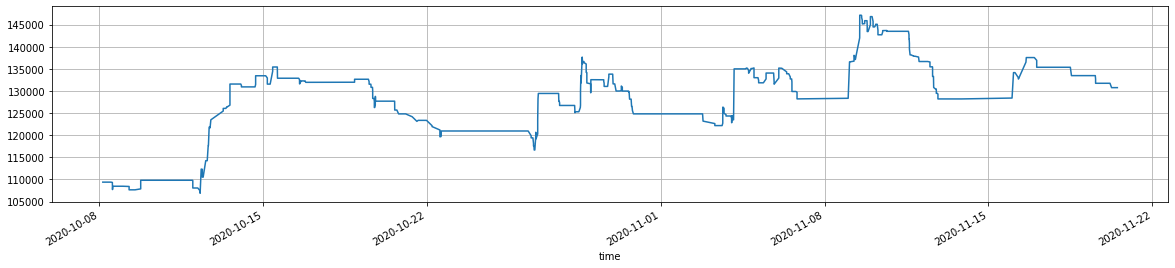

In [14]:
df.cash.plot(figsize=(20,4), grid=True);

In [15]:
by_contract = pd.pivot_table(df, values='realizedPNL', index=df.index, columns=['contract'])
by_contract['total'] = by_contract.sum(axis=1)

In [16]:
# number of trades
trades = df.groupby('contract').action.count()
trades, trades.sum()

(contract
 ES     32
 GC     66
 NQ    330
 YM     74
 Name: action, dtype: int64,
 502)

In [17]:
# trades per day
days = len(by_contract.resample('B').count().index)
trades/days, trades.sum()/days

(contract
 ES     1.0000
 GC     2.0625
 NQ    10.3125
 YM     2.3125
 Name: action, dtype: float64,
 15.6875)

In [18]:
# commission paid
df.groupby('contract').commission.sum()

contract
ES      96.57
GC     190.80
NQ    1091.16
YM     201.23
Name: commission, dtype: float64

In [19]:
df.commission.sum()

1579.7600000000002

In [20]:
# per trade stats (pro rated per macro contract)
exits = df[df.realizedPNL!=0]
dfs = {}
for contract in exits.contract.unique():
    dfs[contract] = exits[exits.contract == contract]
dfs['total'] = exits
results = pd.DataFrame(columns=['success_rate', 'average_PNL', 'average_gain', 'average_loss', 
                                'win_ratio', 'EV/contract', 'number_of_contracts'])
for c, d in dfs.items():
    row = pd.Series()
    row['success_rate'] = round((d[d.realizedPNL > 0]).realizedPNL.count() / d.realizedPNL.count(), 2)
    d['pnl_per_contract'] = d.realizedPNL / d.amount
    row['average_PNL'] = round(d['pnl_per_contract'].mean(), 2)
    row['average_gain'] = round((d[d.realizedPNL > 0])['pnl_per_contract'].mean(), 2)
    row['average_loss'] = round((d[d.realizedPNL < 0])['pnl_per_contract'].mean(), 2)
    row['win_ratio'] = round(abs(row['average_gain'] / row['average_loss']), 2)
    row['EV/contract'] = round((row['average_gain'] * row['success_rate']) + (
        row['average_loss'] * (1 - row['success_rate'])), 2)
    row['number_of_contracts'] = d.amount.sum()
    results.loc[c] = row
results

,success_rate,average_PNL,average_gain,average_loss,win_ratio,EV/contract,number_of_contracts
NQ,0.36,-22.06,1065.31,-628.48,1.70,-18.72,206.5
YM,0.39,204.66,1615.60,-715.51,2.26,193.62,38.6
GC,0.27,-76.59,1356.78,-614.11,2.21,-81.97,30.0
ES,0.41,696.97,2953.62,-882.69,3.35,690.20,11.1
total,0.36,54.10,1336.05,-654.56,2.04,62.06,286.2


In [21]:
daily = by_contract.resample('B').sum()
daily = daily /  (allocs * cash)
#daily[['CL', 'ES', 'GC', 'NQ']].plot(figsize=(20,8), grid=True);

In [22]:
# instrument correlations
log_returns = np.log(daily + 1)
log_returns.corr()

,ES,GC,NQ,YM,total
ES,1.000000,-0.017753,0.278392,0.411098,0.522802
GC,-0.017753,1.000000,-0.123935,0.079604,0.125442
NQ,0.278392,-0.123935,1.000000,0.369269,0.886887
YM,0.411098,0.079604,0.369269,1.000000,0.684644
total,0.522802,0.125442,0.886887,0.684644,1.000000


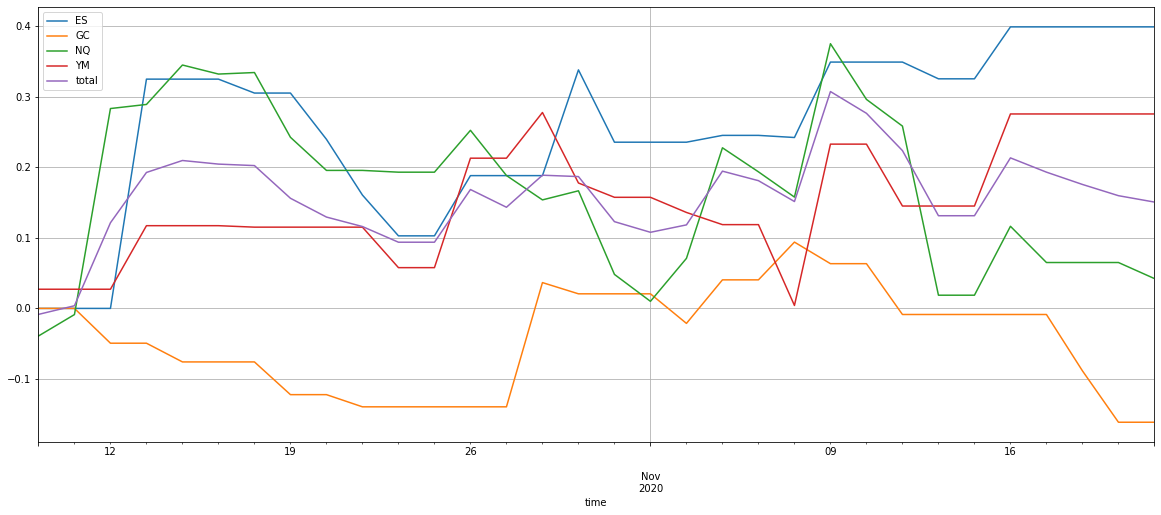

In [23]:
log_returns.cumsum().plot(figsize=(20,8), grid=True);

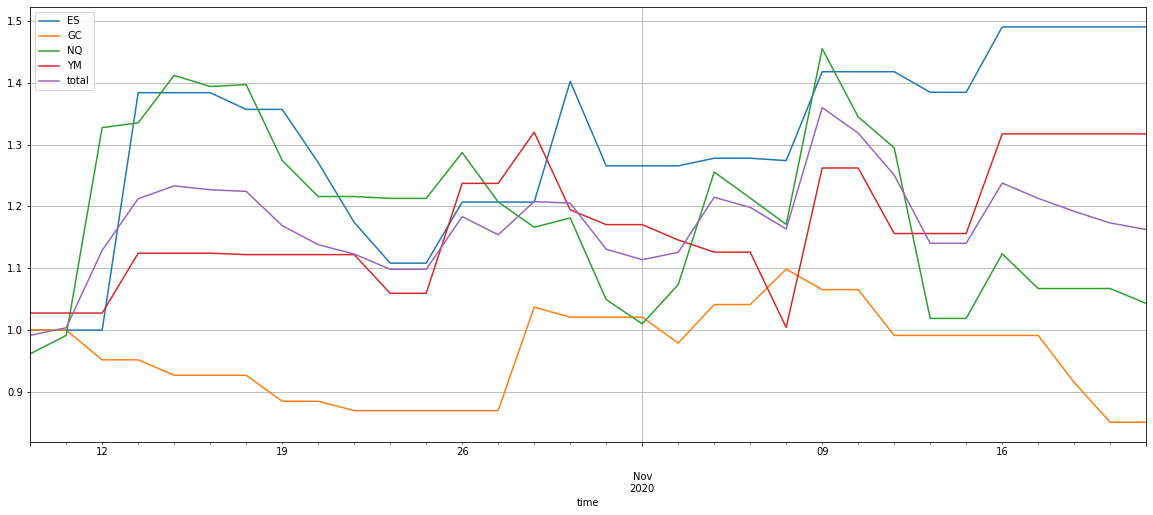

In [24]:
returns = daily.copy()
returns_index = (returns + 1).cumprod()
returns_index.plot(figsize=(20,8), grid=True);

In [25]:
stats = pd.DataFrame()
for col in daily.columns:
    stats[col] = perf_stats(daily[col])
stats

,ES,GC,NQ,YM,total
Annual return,22.145968,-0.719257,0.394856,7.758927,2.276257
Cumulative returns,0.490276,-0.148972,0.043165,0.317275,0.162639
Annual volatility,1.324690,0.740492,1.593814,1.125933,0.865519
Sharpe ratio,2.940324,-1.372168,0.927083,2.442134,1.775488
Calmar ratio,111.195037,-3.192514,1.316992,32.427871,14.105994
Stability,0.468330,0.032090,0.108122,0.463675,0.164578
Max drawdown,-0.199163,-0.225295,-0.299816,-0.239267,-0.161368
Omega ratio,2.459051,0.706855,1.208569,1.865180,1.389705
Sortino ratio,9.076552,-2.344998,1.772633,5.471550,3.727771
Skew,2.902458,2.232725,1.344426,1.605624,1.187020


In [26]:
# monthly returns in percent
monthly_log_returns = log_returns.resample('M').sum()
monthly_returns = np.exp(monthly_log_returns)-1
round(monthly_returns, 4) * 100

,ES,GC,NQ,YM,total
time,,,,,
2020-10-31,26.56,2.09,4.94,17.05,13.08
2020-11-30,17.75,-16.64,-0.59,12.54,2.81


In [27]:
# total returns by contract in percent
round(np.exp(monthly_log_returns.sum())-1, 2)* 100

ES       49.0
GC      -15.0
NQ        4.0
YM       32.0
total    16.0
dtype: float64

In [28]:
df.sort_values('realizedPNL', ascending=False)[['contract', 'action', 'price', 'realizedPNL']]

,contract,action,price,realizedPNL
time,,,,
2020-11-04 03:14:38.840,NQ,SELL,11651.500000,11506.6
2020-11-09 01:36:53.379,NQ,SELL,12311.000000,8236.6
2020-11-16 01:46:56.858,NQ,SELL,12030.000000,5747.4
2020-10-12 08:41:25.532,NQ,SELL,11849.250000,5112.4
2020-11-09 12:00:55.681,YM,SELL,29465.000000,4885.8
...,...,...,...,...
2020-10-29 23:07:31.042,NQ,BUY,11232.000000,-2003.4
2020-10-29 00:09:52.931,YM,BUY,26615.000000,-2028.4
2020-11-05 20:17:09.669,NQ,SELL,12058.500000,-2038.4


In [29]:
daily.sort_values('total', ascending=False)

,ES,GC,NQ,YM,total
time,,,,,
2020-11-09,0.112801,-0.030102,0.242791,0.256893,0.168667
2020-10-12,0.000000,-0.048118,0.339078,0.000000,0.124805
2020-11-16,0.076374,0.000000,0.102596,0.139371,0.085428
2020-11-04,0.009712,0.063649,0.169632,-0.017112,0.079110
2020-10-26,0.089103,0.000000,0.061112,0.167803,0.077534
2020-10-13,0.383923,0.000000,0.005817,0.094245,0.073878
2020-10-28,0.000000,0.192513,-0.033958,0.066886,0.046454
2020-10-14,0.000000,-0.026177,0.057465,0.000000,0.017096
2020-10-09,0.000000,0.000000,0.030839,0.000000,0.012336
